## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [117]:
from sklearn import datasets, metrics
# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image  
from sklearn.externals.six import StringIO  

In [118]:
# 讀取葡萄酒資料集
wine = datasets.load_wine()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=4)

# 建立模型
clf = DecisionTreeClassifier()

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [119]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.8888888888888888


In [120]:
metrics.f1_score(y_test, y_pred,average='weighted')

0.8888888888888888

In [121]:
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [122]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.01277488 0.01724609 0.         0.         0.04135542 0.
 0.09369903 0.         0.         0.34833685 0.04244155 0.0400926
 0.40405357]


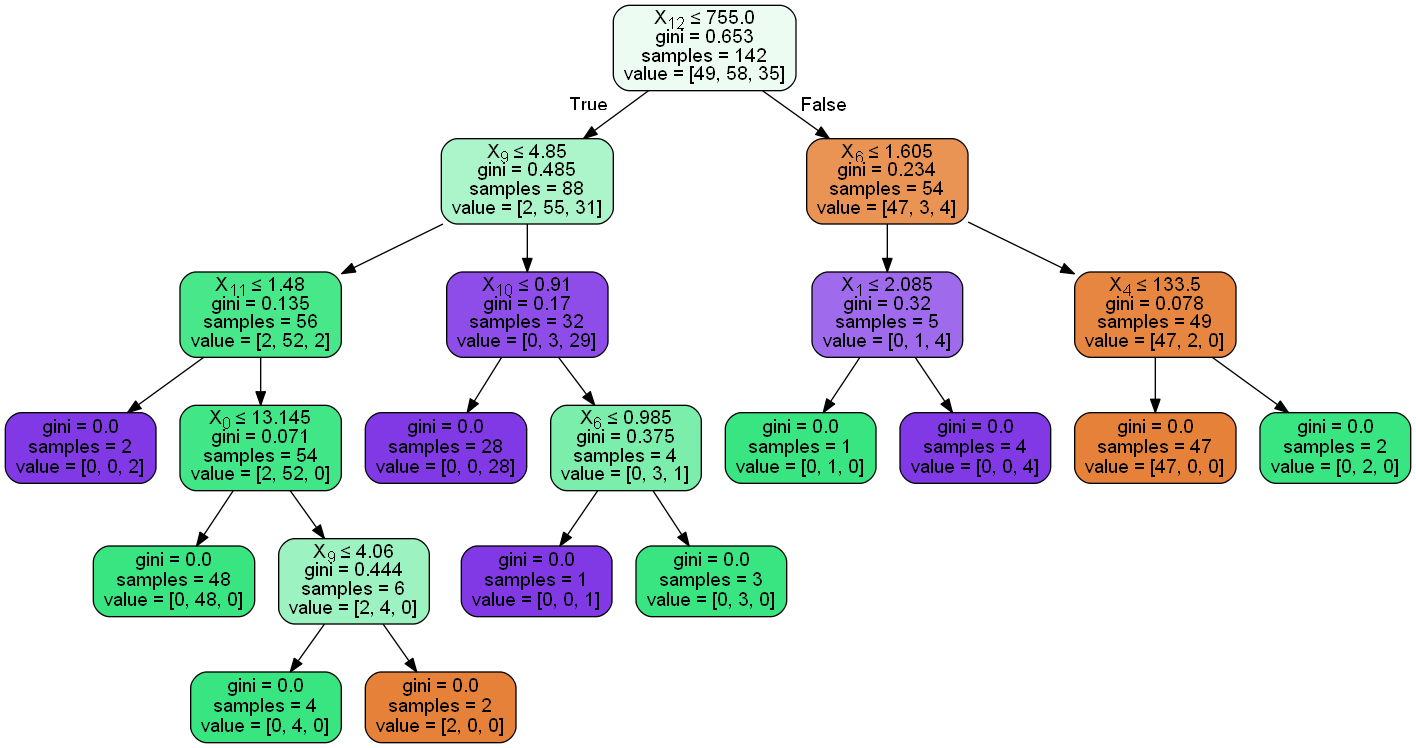

In [123]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [124]:
#改變參數再試一次
clf = DecisionTreeClassifier(criterion='entropy',min_samples_split = 10,min_samples_leaf=5)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [125]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  1.0


In [126]:
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [127]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.         0.01615175 0.01428649 0.         0.         0.
 0.43440035 0.         0.         0.17805324 0.         0.
 0.35710817]


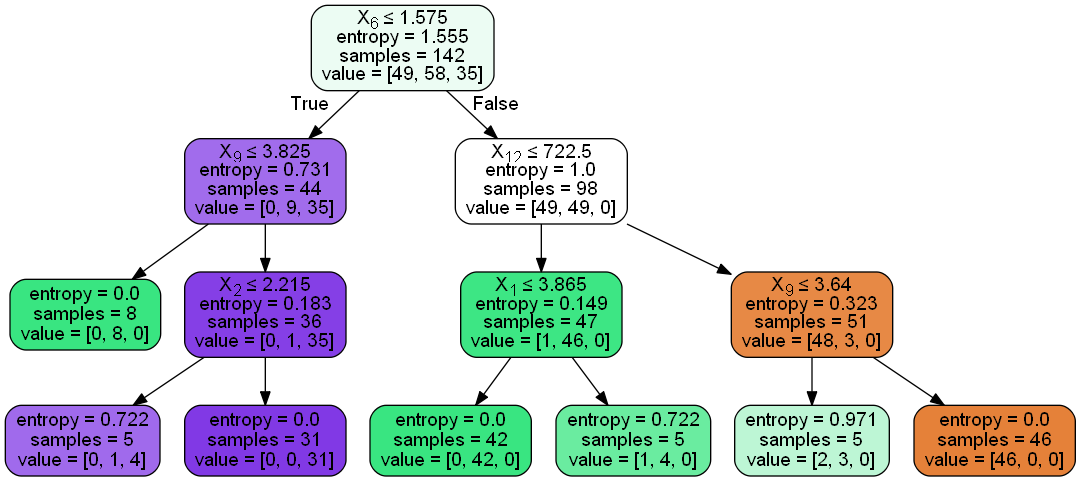

In [128]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [129]:
# 讀取boston資料集
boston = datasets.load_boston()

# 切分訓練集/測試集
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=8)

# 建立模型
clr = DecisionTreeRegressor()

# 訓練模型
clr.fit(X_train, y_train)

# 預測測試集
y_pred = clr.predict(X_test)

In [130]:
mse = mean_squared_error(y_test, y_pred)
mse

25.201764705882358

In [131]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [132]:
print("Importance: ", clr.feature_importances_)

Importance:  [0.03852795 0.00140461 0.00221782 0.         0.02828459 0.59253626
 0.01406301 0.07915787 0.00151367 0.00745726 0.01389348 0.01184739
 0.20909609]


In [133]:
dot_data = StringIO()
export_graphviz(clr, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [134]:
#改變參數再試一次
clr = DecisionTreeRegressor(criterion='mae',min_samples_split = 10,min_samples_leaf=5)

# 訓練模型
clr.fit(X_train, y_train)

# 預測測試集
y_pred = clr.predict(X_test)

In [135]:
mse = mean_squared_error(y_test, y_pred)
mse

28.83517156862745

In [136]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [137]:
print("Importance: ", clr.feature_importances_)

Importance:  [0.07558083 0.         0.00719355 0.         0.02021969 0.46689997
 0.02226111 0.0569651  0.         0.00646447 0.03786332 0.005784
 0.30076796]


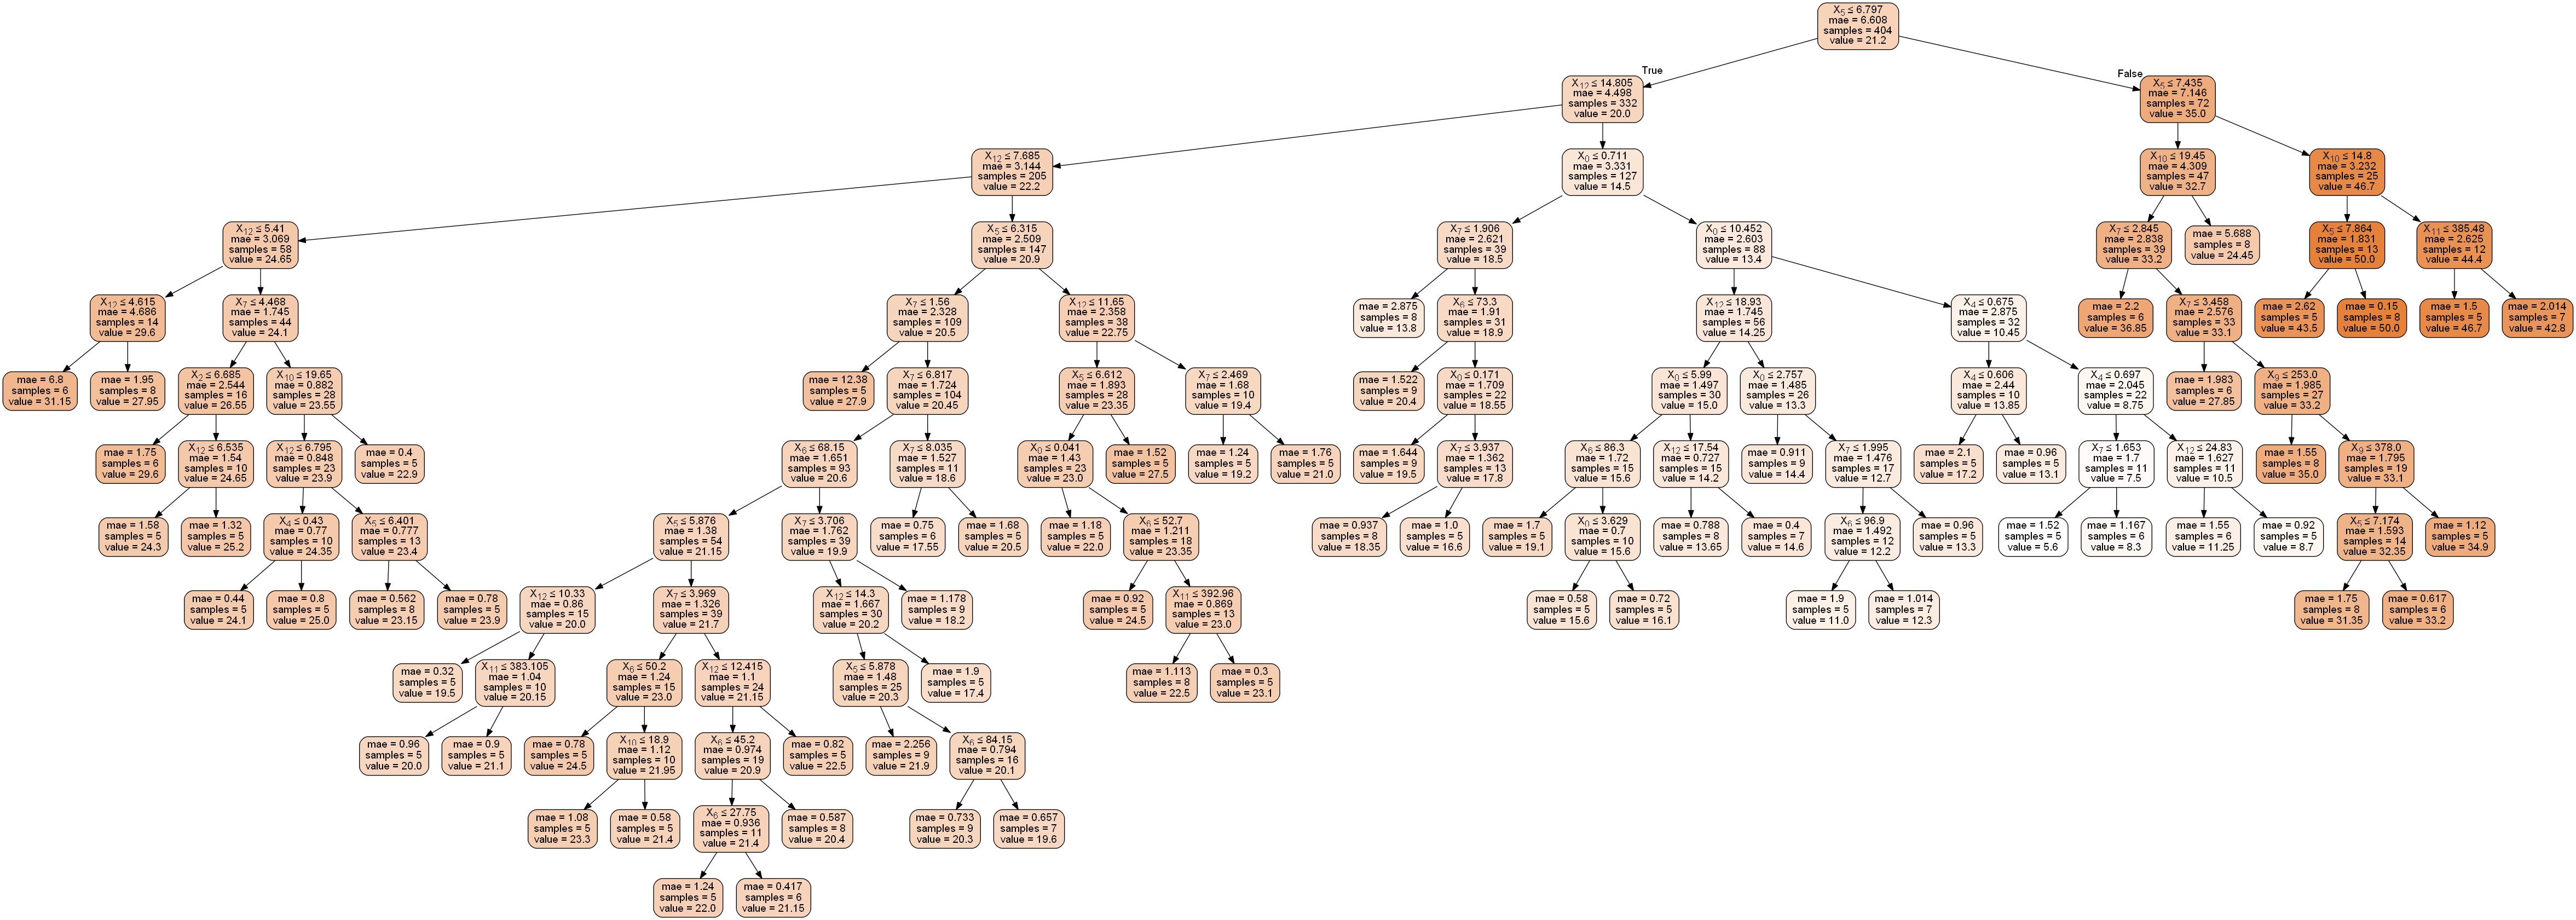

In [138]:
dot_data = StringIO()
export_graphviz(clr, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())